In [ ]:
import pandas as pd
import os

# Supposons que df est déjà chargé dans votre dataframe
df = pd.read_csv("all_data_for_users_with_anomalies.csv")  # Exemple de lecture du fichier CSV

# Créer un répertoire pour enregistrer les fichiers CSV
os.makedirs("split_by_clusters_2", exist_ok=True)

# Obtenez les clusters uniques dans votre DataFrame
clusters = df['cluster'].unique()

# Boucle pour chaque cluster et sauvegarde les données dans un fichier CSV
for cluster_id in clusters:
    # Filtrer les données pour ce cluster
    cluster_data = df[df['cluster'] == cluster_id]
    
    # Définir le nom du fichier CSV pour ce cluster
    cluster_filename = f"split_by_clusters_2/cluster_anomaly{cluster_id}.csv"
    
    # Sauvegarder les données filtrées dans un fichier CSV
    cluster_data.to_csv(cluster_filename, index=False)
    print(f"Données du cluster {cluster_id} sauvegardées sous {cluster_filename}")


In [18]:
import pandas as pd
df0 = pd.read_csv("split_by_clusters/cluster_0.csv")  # Exemple de lecture du fichier CSV
df1 = pd.read_csv("split_by_clusters/cluster_1.csv")  # Exemple de lecture du fichier CSV
df2 = pd.read_csv("split_by_clusters/cluster_2.csv")  # Exemple de lecture du fichier CSV


In [19]:
df2.describe()

,user_number,Consommation,cluster
count,288553.000000,288553.000000,288553.0
mean,47.364339,13.108656,2.0
std,26.748476,1308.734909,0.0
min,5.000000,-248520.000000,2.0
25%,25.000000,0.000000,2.0
50%,41.000000,1.000000,2.0
75%,72.000000,13.000000,2.0
max,92.000000,248541.000000,2.0


In [20]:
import pandas as pd

# Charger les données des clusters
df0 = pd.read_csv("split_by_clusters/cluster_0.csv")
df1 = pd.read_csv("split_by_clusters/cluster_1.csv")
df2 = pd.read_csv("split_by_clusters/cluster_2.csv")

# Calcul des statistiques par utilisateur pour chaque cluster
stats_cluster_0 = df0.groupby('user_number')['Consommation'].agg(
    total_consumption='sum',
    avg_consumption='mean',
    max_consumption='max',
    min_consumption='min',
    days_active='count'  # Nombre de lignes
).reset_index()

stats_cluster_1 = df1.groupby('user_number')['Consommation'].agg(
    total_consumption='sum',
    avg_consumption='mean',
    max_consumption='max',
    min_consumption='min',
    days_active='count'
).reset_index()

stats_cluster_2 = df2.groupby('user_number')['Consommation'].agg(
    total_consumption='sum',
    avg_consumption='mean',
    max_consumption='max',
    min_consumption='min',
    days_active='count'
).reset_index()

In [21]:
# Afficher les statistiques pour le premier cluster
stats_cluster_0

,user_number,total_consumption,avg_consumption,max_consumption,min_consumption,days_active
0,1,48950,10.000000,401,0,4895
1,3,232782,26.849135,752,0,8670
2,4,65187,7.689867,335,0,8477
3,6,22406,2.760379,148,0,8117
4,7,96804,11.835677,204,0,8179
5,8,26994,4.336386,164,0,6225
6,11,83484,10.187187,282,0,8195
7,13,92803,19.842420,913,0,4677
8,17,54343,6.620736,224,0,8208
9,22,98254,11.390447,12301,-12288,8626


In [22]:
# Afficher les statistiques pour le premier cluster
stats_cluster_1

,user_number,total_consumption,avg_consumption,max_consumption,min_consumption,days_active
0,2,109823,12.840290,276,-1,8553
1,14,166757,19.338629,357,0,8623
2,16,83922,10.540317,255,0,7962
3,24,120386,14.114902,345,-2,8529
4,34,163758,40.424093,5868,-7,4051
5,38,58571,7.616515,177,-7,7690
6,44,76057,110.547965,56537,0,688
7,47,164066,19.050859,263,-45,8612
8,50,103251,11.936532,314,0,8650
9,63,176068,21.419465,839,-81,8220


In [23]:
# Afficher les statistiques pour le premier cluster
stats_cluster_2

,user_number,total_consumption,avg_consumption,max_consumption,min_consumption,days_active
0,5,107193,14.226012,555,-90,7535
1,9,98919,11.591165,362,0,8534
2,10,124296,18.222548,465,0,6821
3,12,40740,14.702274,463,0,2771
4,15,81416,9.416609,248541,-248520,8646
5,18,132163,17.879194,520,0,7392
6,19,95075,10.982442,354,0,8657
7,20,89007,10.364113,304,0,8588
8,21,55855,6.635975,338,0,8417
9,25,129567,15.111617,255,-1,8574


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns


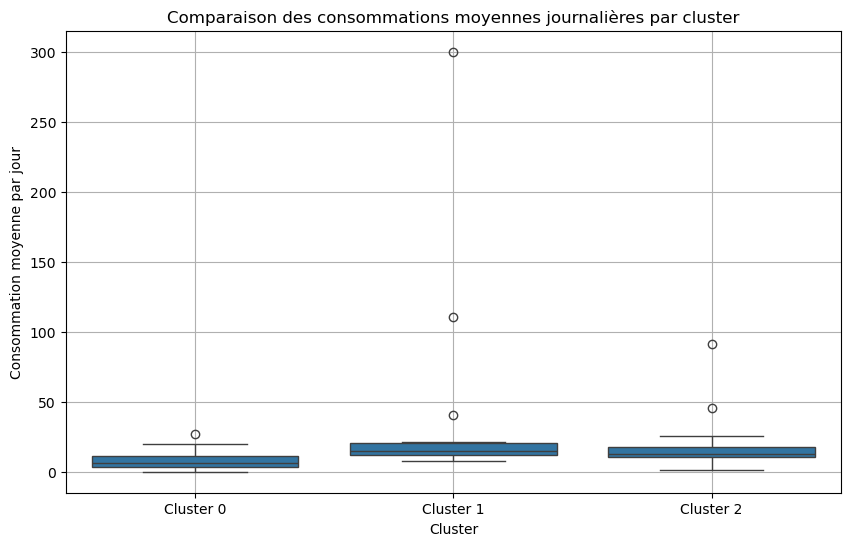

In [28]:
# Ajouter une colonne pour indiquer le cluster
stats_cluster_0['cluster'] = 'Cluster 0'
stats_cluster_1['cluster'] = 'Cluster 1'
stats_cluster_2['cluster'] = 'Cluster 2'

# Combiner les trois clusters dans un seul DataFrame
all_stats = pd.concat([stats_cluster_0, stats_cluster_1, stats_cluster_2])

# Boxplot avec Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='avg_consumption', data=all_stats)
plt.xlabel('Cluster')
plt.ylabel('Consommation moyenne par jour')
plt.title('Comparaison des consommations moyennes journalières par cluster')
plt.grid()
plt.show()


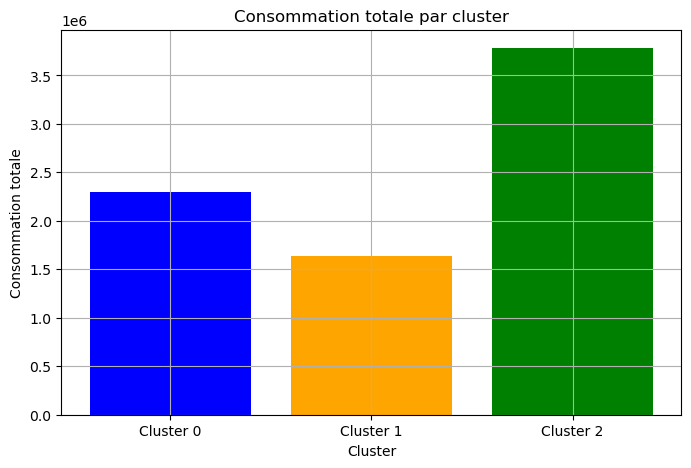

In [31]:
# Calculer la somme des consommations totales par cluster
total_by_cluster = {
    'Cluster 0': stats_cluster_0['total_consumption'].sum(),
    'Cluster 1': stats_cluster_1['total_consumption'].sum(),
    'Cluster 2': stats_cluster_2['total_consumption'].sum()
}

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(total_by_cluster.keys(), total_by_cluster.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Cluster')
plt.ylabel('Consommation totale')
plt.title('Consommation totale par cluster')
plt.grid()
plt.show()


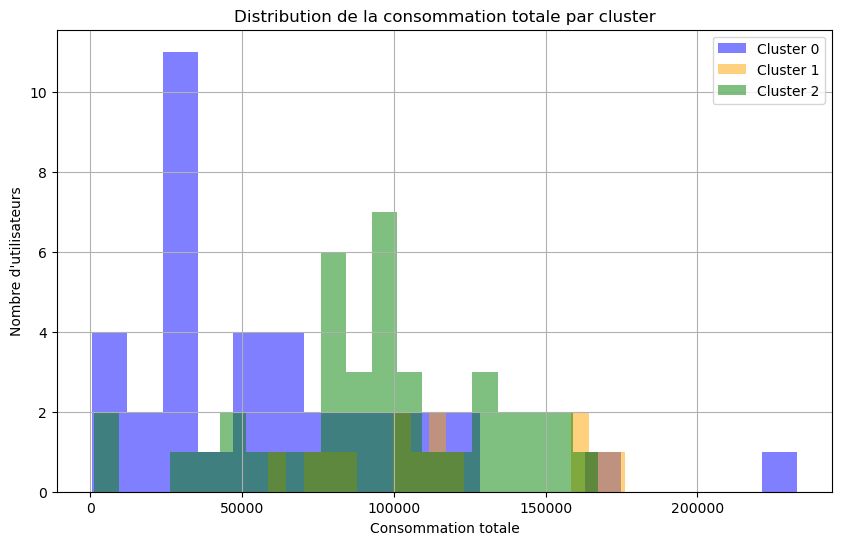

In [32]:
plt.figure(figsize=(10, 6))
plt.hist(stats_cluster_0['total_consumption'], bins=20, alpha=0.5, label='Cluster 0', color='blue')
plt.hist(stats_cluster_1['total_consumption'], bins=20, alpha=0.5, label='Cluster 1', color='orange')
plt.hist(stats_cluster_2['total_consumption'], bins=20, alpha=0.5, label='Cluster 2', color='green')
plt.xlabel('Consommation totale')
plt.ylabel('Nombre d\'utilisateurs')
plt.title('Distribution de la consommation totale par cluster')
plt.legend()
plt.grid()
plt.show()


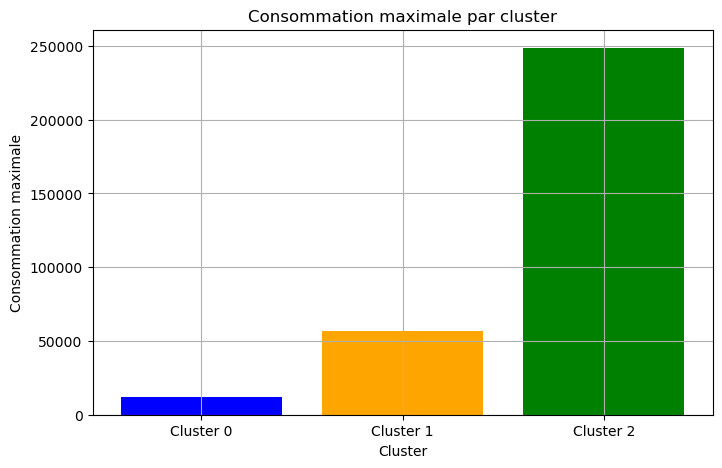

In [33]:
# Calculer la consommation maximale par cluster
max_by_cluster = {
    'Cluster 0': stats_cluster_0['max_consumption'].max(),
    'Cluster 1': stats_cluster_1['max_consumption'].max(),
    'Cluster 2': stats_cluster_2['max_consumption'].max()
}

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(max_by_cluster.keys(), max_by_cluster.values(), color=['blue', 'orange', 'green'])
plt.xlabel('Cluster')
plt.ylabel('Consommation maximale')
plt.title('Consommation maximale par cluster')
plt.grid()
plt.show()
